Predicting Fraud with TensorFlow
---

Predicting credit card fraud in the transactional data is the aim of this analysis. Tensorflow will be used by me to construct the prediction model.


Dataset link:
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

Importing the necessary libraries

In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam

Load the dataset

In [18]:
# Load the dataset
df = pd.read_csv('/content/creditcard[1].csv')

In [19]:
# Display the first few rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [21]:
# Display the shape of the dataset
df.shape

(11959, 31)

In [24]:
# Display descriptive statistics of the DataFrame
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,...,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000
mean,8009.996822,-0.216230,0.277097,0.889505,0.282606,-0.086585,0.139986,-0.121943,-0.048727,0.911579,...,-0.061474,-0.153850,-0.033709,0.017113,0.104794,0.062891,0.008320,0.000271,62.352617,0.004349
std,6204.332248,1.583914,1.308884,1.331824,1.478162,1.191776,1.306285,1.153899,1.246823,1.192349,...,0.918705,0.626631,0.505355,0.591394,0.429413,0.561603,0.405100,0.261230,178.247010,0.065803
min,0.000000,-27.670569,-34.607649,-22.804686,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.593642,-19.254328,-2.512377,-4.781606,-1.338556,-7.976100,-3.575312,0.000000,0.000000
25%,2542.000000,-0.978944,-0.261503,0.417186,-0.622456,-0.688114,-0.622521,-0.591335,-0.185243,0.196741,...,-0.268151,-0.543613,-0.171833,-0.333251,-0.144092,-0.353864,-0.080064,-0.015461,5.000000,0.000000
50%,6662.000000,-0.340742,0.256346,0.951223,0.213029,-0.183847,-0.146903,-0.094876,0.013616,0.894911,...,-0.130062,-0.124900,-0.044299,0.072099,0.143136,0.001972,-0.003039,0.015452,15.950000,0.000000
75%,12382.000000,1.161273,0.883626,1.613678,1.159141,0.346298,0.508432,0.431657,0.267560,1.589120,...,0.021687,0.234029,0.075686,0.401798,0.380076,0.409231,0.106344,0.073171,50.000000,0.000000
max,20642.000000,1.960497,9.092123,4.101716,11.927512,34.099309,21.393069,34.303177,5.499963,10.392889,...,22.614889,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


Data cleaning
---

In [20]:
# Check for missing values in the dataset
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [22]:
# Display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11959 entries, 0 to 11958
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    11959 non-null  int64  
 1   V1      11959 non-null  float64
 2   V2      11959 non-null  float64
 3   V3      11959 non-null  float64
 4   V4      11959 non-null  float64
 5   V5      11959 non-null  float64
 6   V6      11959 non-null  float64
 7   V7      11959 non-null  float64
 8   V8      11959 non-null  float64
 9   V9      11959 non-null  float64
 10  V10     11959 non-null  float64
 11  V11     11959 non-null  float64
 12  V12     11959 non-null  float64
 13  V13     11959 non-null  float64
 14  V14     11959 non-null  float64
 15  V15     11959 non-null  float64
 16  V16     11959 non-null  float64
 17  V17     11959 non-null  float64
 18  V18     11959 non-null  float64
 19  V19     11959 non-null  float64
 20  V20     11958 non-null  float64
 21  V21     11958 non-null  float64
 22

In [23]:
# Display the count of each class in the 'Class' column
df['Class'].value_counts()

0.0    11906
1.0       52
Name: Class, dtype: int64

In [25]:
# Check if there are any missing values in the DataFrame
df.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20        True
V21        True
V22        True
V23        True
V24        True
V25        True
V26        True
V27        True
V28        True
Amount     True
Class      True
dtype: bool

In [26]:
# Display the columns present in the DataFrame
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [27]:
# Separate the fraud and non-fraud transactions
non_fraud = df[df['Class']==0]
fraud = df[df['Class']==1]

In [28]:
# Sample the non-fraud transactions to match the number of fraud transactions
non_fraud = non_fraud.sample(fraud.shape[0])

In [29]:
# Combine fraud and sampled non-fraud transactions
df = fraud.append(non_fraud, ignore_index=True)

<ipython-input-29-90853c0e64ef>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = fraud.append(non_fraud, ignore_index=True)


In [30]:
# Display the count of each class after sampling
df['Class'].value_counts()

1.0    52
0.0    52
Name: Class, dtype: int64

In [31]:
# Separate features (X) and target variable (y)
X = df.drop('Class', axis=1)
y = df['Class']

In [32]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [33]:
# Display the shapes of the training and testing sets
X_train.shape, X_test.shape

((83, 30), (21, 30))

In [34]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
# Convert target variables to numpy arrays
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [36]:
# Reshape the input features for compatibility with Conv1D
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [37]:
# Display the shapes after reshaping
X_train.shape, X_test.shape

((83, 30, 1), (21, 30, 1))

Build the CNN model
---

In [38]:
# Build the CNN model
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [39]:
# Set the number of epochs
epochs = 20

In [40]:
# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 32)            96        
                                                                 
 batch_normalization (Batch  (None, 29, 32)            128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 29, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_1 (Bat  (None, 28, 64)            256       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 28, 64)            0

In [41]:
# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
# Train the model
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
3/3 [==============================] - 2s 169ms/step - loss: 1.2202 - accuracy: 0.5663 - val_loss: 0.5695 - val_accuracy: 0.8095
Epoch 2/20
3/3 [==============================] - 0s 26ms/step - loss: 0.2642 - accuracy: 0.8795 - val_loss: 0.5072 - val_accuracy: 0.8095
Epoch 3/20
3/3 [==============================] - 0s 24ms/step - loss: 0.2710 - accuracy: 0.9277 - val_loss: 0.4715 - val_accuracy: 0.8095
Epoch 4/20
3/3 [==============================] - 0s 25ms/step - loss: 0.1534 - accuracy: 0.9518 - val_loss: 0.4509 - val_accuracy: 0.8095
Epoch 5/20
3/3 [==============================] - 0s 25ms/step - loss: 0.1680 - accuracy: 0.9639 - val_loss: 0.4383 - val_accuracy: 0.8571
Epoch 6/20
3/3 [==============================] - 0s 33ms/step - loss: 0.1316 - accuracy: 0.9639 - val_loss: 0.4359 - val_accuracy: 0.9048
Epoch 7/20
3/3 [==============================] - 0s 32ms/step - loss: 0.1175 - accuracy: 0.9639 - val_loss: 0.4415 - val_accuracy: 0.9048
Epoch 8/20
3/3 [==========

Plot the learning curve
---

In [45]:
def plot_learningCurve(history, epoch):
    # Plot training & validation accuracy values
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()



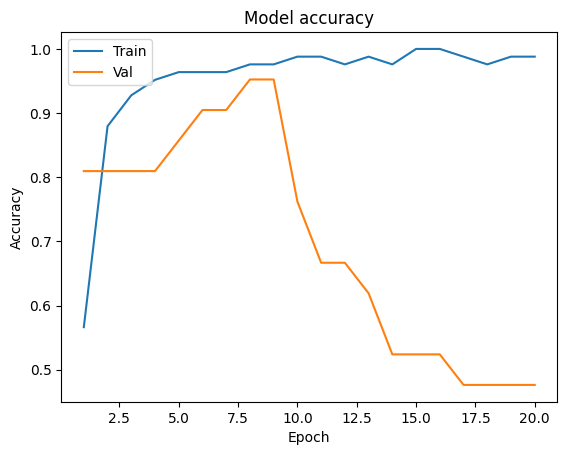

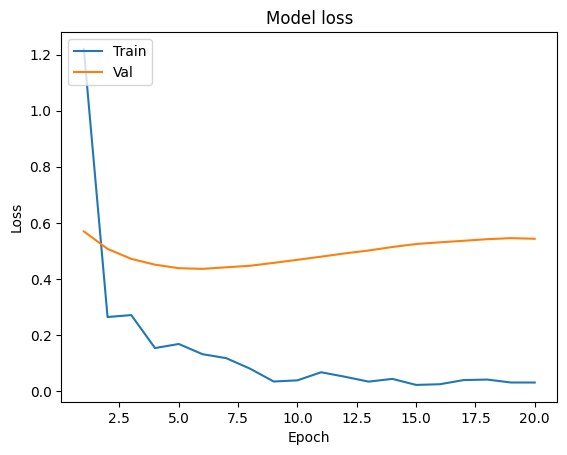

In [49]:
# Call the function to plot the learning curve
plot_learningCurve(history, epochs)


In [ ]:
"""Adding MaxPooling layers
Set the number of epochs/"""
epochs = 50

Epoch 1/20
3/3 [==============================] - 2s 141ms/step - loss: 1.7999 - accuracy: 0.4337 - val_loss: 0.6780 - val_accuracy: 0.4762
Epoch 2/20
3/3 [==============================] - 0s 24ms/step - loss: 0.7557 - accuracy: 0.7229 - val_loss: 0.6525 - val_accuracy: 0.4762
Epoch 3/20
3/3 [==============================] - 0s 23ms/step - loss: 0.7757 - accuracy: 0.6867 - val_loss: 0.6266 - val_accuracy: 0.7143
Epoch 4/20
3/3 [==============================] - 0s 32ms/step - loss: 0.2898 - accuracy: 0.8675 - val_loss: 0.6020 - val_accuracy: 0.9048
Epoch 5/20
3/3 [==============================] - 0s 24ms/step - loss: 0.3082 - accuracy: 0.8434 - val_loss: 0.5807 - val_accuracy: 0.8571
Epoch 6/20
3/3 [==============================] - 0s 26ms/step - loss: 0.2608 - accuracy: 0.8675 - val_loss: 0.5631 - val_accuracy: 0.8571
Epoch 7/20
3/3 [==============================] - 0s 34ms/step - loss: 0.2625 - accuracy: 0.8916 - val_loss: 0.5467 - val_accuracy: 0.8571
Epoch 8/20
3/3 [==========

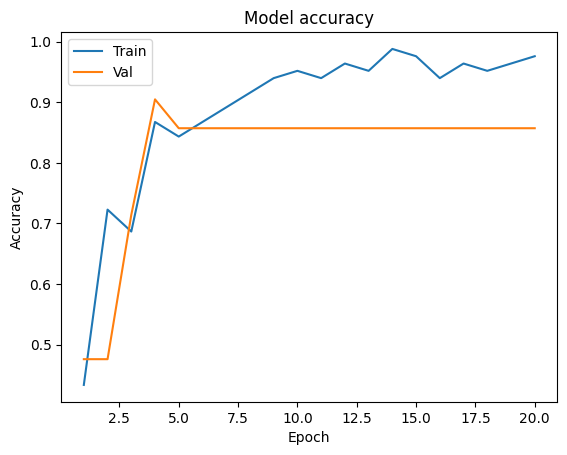

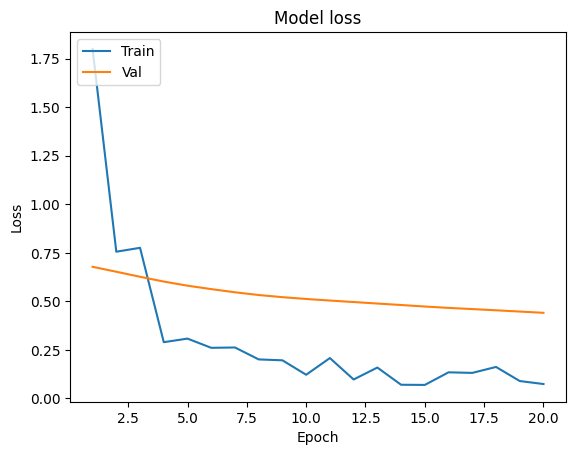

In [56]:
# Build the CNN model with MaxPooling layers
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))  # Adding MaxPooling layer
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))  # Adding MaxPooling layer
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

# Plot the learning curve
plot_learningCurve(history, epochs)